In [ ]:
# Name - Anuj Kumar Tahlan
# Student ID - 21252775
# Maynooth University, 
# Msc. Computer Science (Software Engineering)
# Session 2021-2022

In [ ]:
# Project - Traffic Sign Recognition (Contains two subparts: Detection and Classification)
# This is Part 2(a) of the Project. It is called, Traffic Sign Classification ( Complete Code : Training and Testing )
# Note - I have already trained the CNN model for traffic sign classification. 
# If, you only want to test the trained model, then refer to Testing Code separately in Part 2(b) ( mentioned below )

#Repository Link for all files - https://github.com/anuj-tahlan/Traffic_Sign_Recognition.git

# Other Parts of this Project :
# Part 1 (a) of the Project - Traffic Sign Detection ( Detecting traffic signs from real traffic scenes )
# code file name - Traffic_Sign_Detection_Using_Yolo(Training and Testing).ipynb

# Part 1(b) of the Project - Testing Traffic Sign Detection (Testing the Trained Model)
# code file name - Testing_Model_Traffic_Sign_Detection_Using_Yolo.ipynb

# Part 2(b) - Testing Traffic Sign Classification (Testing the trained model)
# code file - Testing_Traffic_Sign_Classification_Model.ipynb

In [ ]:
# Import required Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow
import tensorflow as tf
import zipfile
from PIL import Image
import os
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
data_list=[] # Empty list to store images as numeric list
image_labels=[] # Empty list to store labels for classes
traffic_sign_classes = 43 # Number of classes of traffic signs , each folders has similar class images

In [3]:
#Mount google drive. Google drive to keep the data safe once the runtime is closed.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
%cd 'gdrive/' # cd command is used to change the directory 

/content/gdrive


In [7]:
#If the following path does not exist create it.
path = '/content/gdrive/MyDrive/Traffic_Sign_Classification' # Set(folder) Traffic_Sign_Classification inside Google Drive
isdir = os.path.isdir(path) 
if not isdir: #If directory is not present 
  os.mkdir('/content/gdrive/MyDrive/Traffic_Sign_Classification/') # make the directory (folder)

In [8]:
#If the following path does not exist create it
path = '/content/gdrive/MyDrive/Traffic_Sign_Classification/dataset'
isdir = os.path.isdir(path) 
if not isdir:
  os.mkdir('/content/gdrive/MyDrive/Traffic_Sign_Classification/dataset/') # make the directory (folder) dataset

In [14]:
# Uncomment Run this command (remove # from last code line) to fetch the Test.zip file when the code is run first time
# I have stored the files on my DropBox which will remain there always. There were file size limitation on GitHub
#!wget -P /content/gdrive/MyDrive/Traffic_Sign_Classification/dataset https://www.dropbox.com/s/tvipvixgsqf0zzj/Test.zip

In [9]:
#Change the directory to dataset folder
#%cd '/content/gdrive/MyDrive/Traffic_Sign_Classification/dataset/'

/content/gdrive/MyDrive/Traffic_Sign_Classification/dataset


In [9]:
# Uncomment the below lines, to unzip Test.zip, run this code only first time if the Test folder already
# exists in Google drive do not run it. 
# Unzip the downloaded folder and saved the unziped files in dataset folder. To run this code Uncomment(remove #) from below three lines
#import zipfile
#unzip = zipfile.ZipFile('Test.zip')
#unzip.extractall('Test')

In [12]:
#Run this command to fetch the Train.zip file when the code is run first time
#!wget -P /content/gdrive/MyDrive/Traffic_Sign_Classification/dataset https://www.dropbox.com/s/vh9nd94xpn78z1x/Train.zip

In [11]:
# Uncomment the below lines, to unzip Train.zip, run this code only first time if the Train folder already
# existed in Google drive do not run it. Uncomment next three lines 
#import zipfile
#unzip = zipfile.ZipFile('Train.zip')
#unzip.extractall('Train')

In [13]:
#Delete all the files once extracted
#!rm Test.zip
#!rm Train.zip

In [15]:
#Build training data array 
current_path = '/content/gdrive/MyDrive/Traffic_Sign_Classification/dataset/Train'

for i in range(traffic_sign_classes):
    path = os.path.join(current_path, str(i))
    img_folder = os.listdir(path)
    for a in img_folder:
        try:             
            image = Image.open(path +'/'+ a)             
            image = image.resize((30,30)) 
            # Resizing all images into 30*30                                                 
            image =np.array(image)             
            data_list.append(image)             
            image_labels.append(i)
        except Exception as e:
            print(e)

In [16]:
#Converting lists into numpy arrays
data_list = np.array(data_list)
image_labels = np.array(image_labels)

In [17]:
print('Images shape:', data_list.shape)
print('Labels shape:', image_labels.shape)

Images shape: (39209, 30, 30, 3)
Labels shape: (39209,)


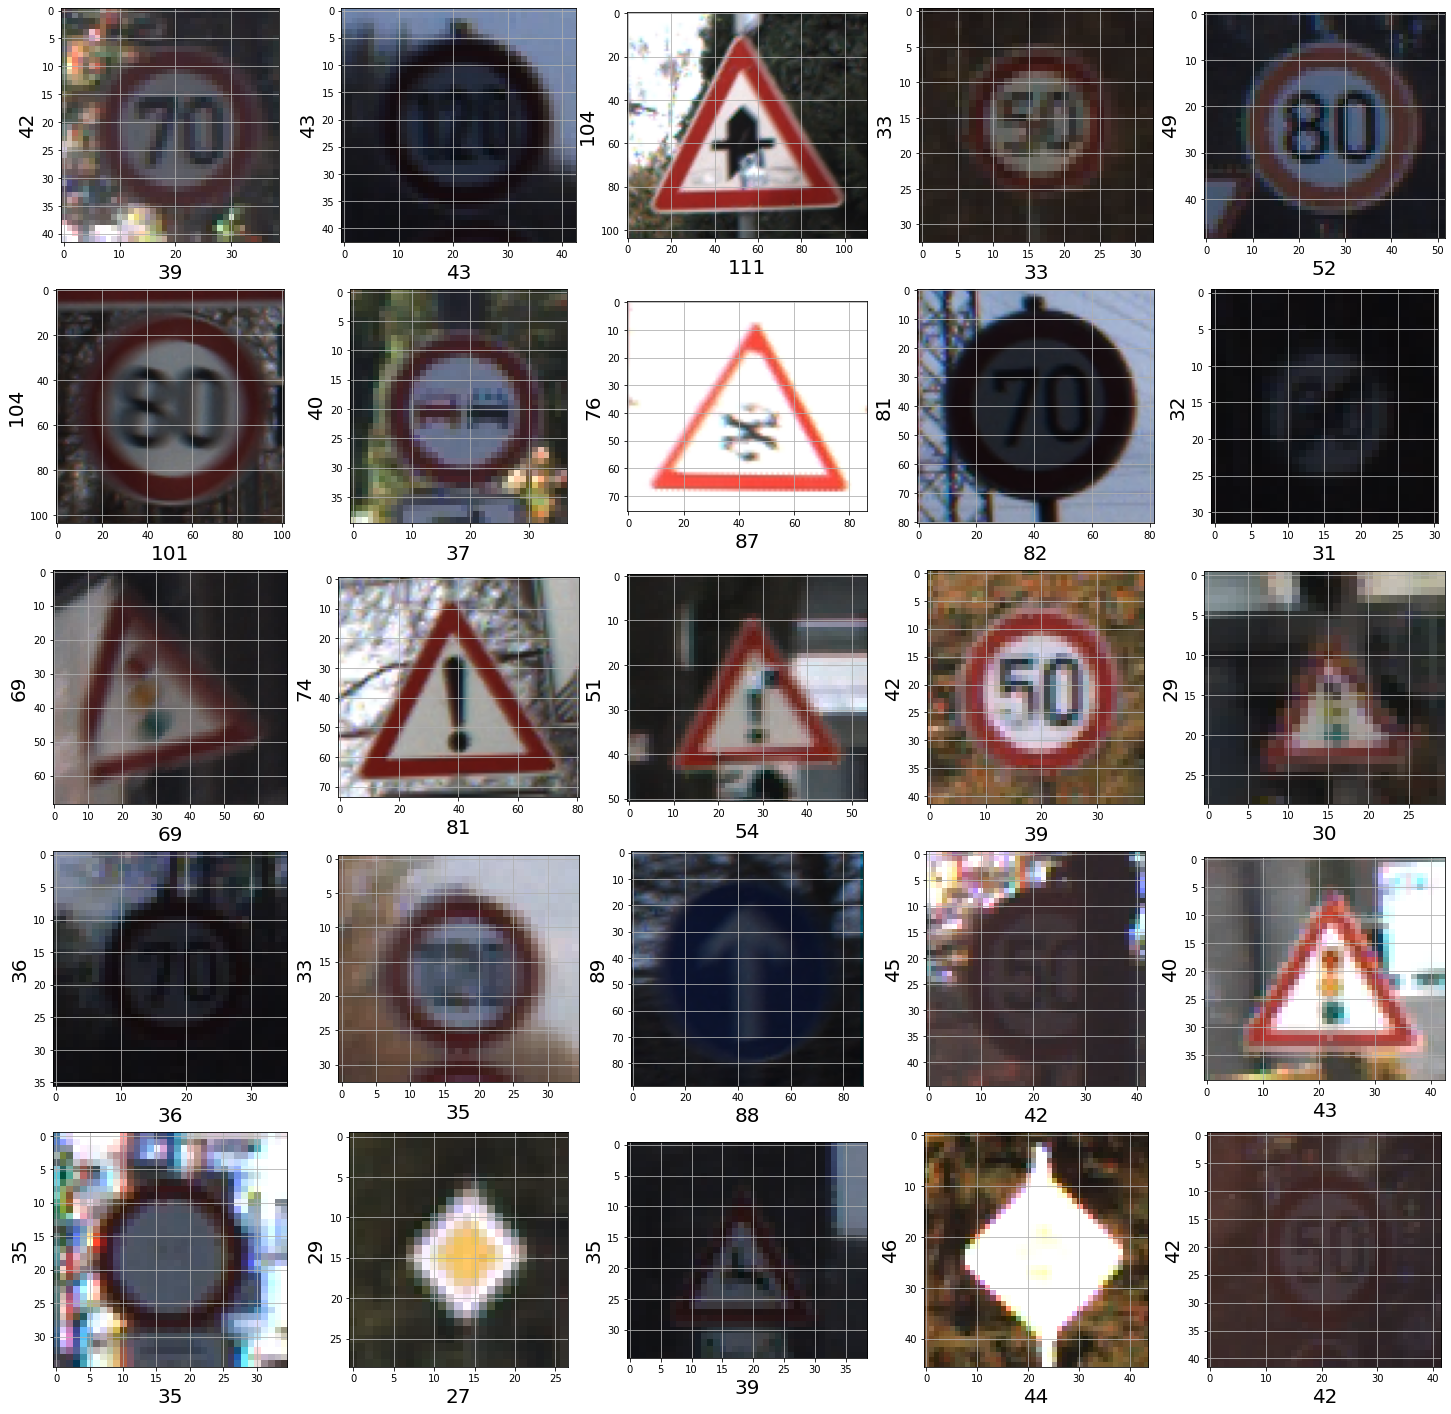

In [18]:
#Displaying Random Images from dataset to show what kind of images are there
import random
from matplotlib.image import imread

test = pd.read_csv('/content/gdrive/MyDrive/Traffic_Sign_Classification/dataset/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image


In [ ]:
#reading Train.csv
train_csv = pd.read_csv('/content/gdrive/MyDrive/Traffic_Sign_Classification/dataset/Train.csv')

Number of unique classes:  43


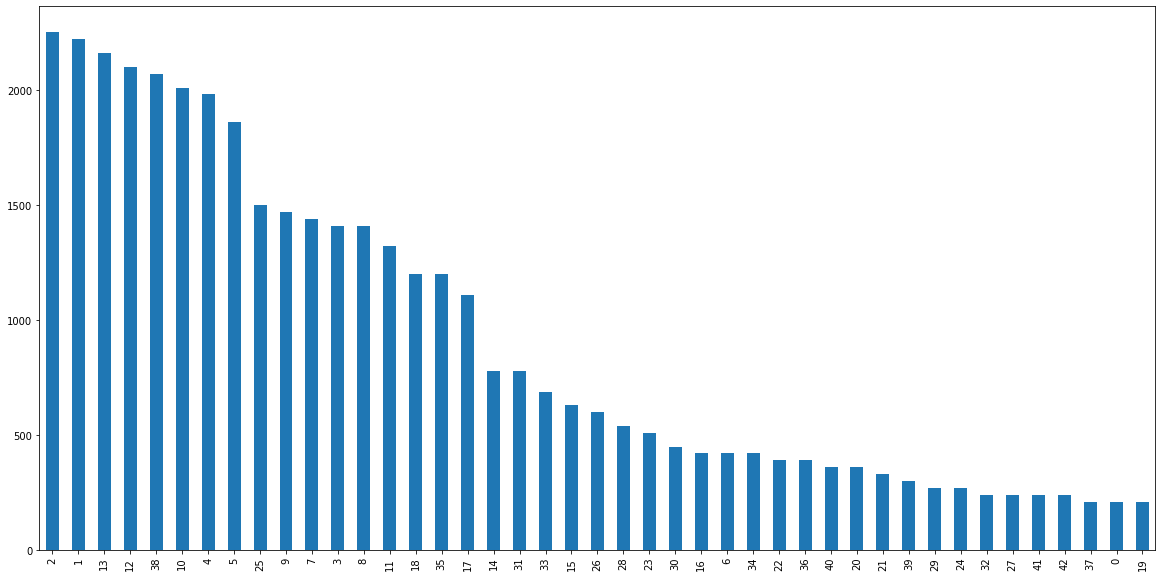

In [ ]:
#number of unique labels in the train dataset
Classes_in_Training = train_csv["ClassId"].nunique()
print("Number of unique classes: ", train_csv["ClassId"].nunique())

# visualising how many images of each class exist in the train dataset
plt.figure(figsize=(20,10))
train_csv["ClassId"].value_counts(sort=True).plot.bar()

**Save Labels & Data for future use**

In [19]:
path = '/content/gdrive/MyDrive/Traffic_Sign_Classification/dataset/training'
isdir = os.path.isdir(path) 
if not isdir:
  os.mkdir('/content/gdrive/MyDrive/Traffic_Sign_Classification/dataset/training') # make a directory training inside dataset

np.save('/content/gdrive/MyDrive/Traffic_Sign_Classification/dataset/training/',data_list) #save data.npy
np.save('/content/gdrive/MyDrive/Traffic_Sign_Classification/dataset/training/',image_labels) #save target.npy


In [13]:
print(data_list.shape, image_labels.shape)

(39209, 32, 32) (39209,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(data_list, image_labels, test_size=0.2, random_state=0)

In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 
# X_train.shape and y_train.shape should be same and X_test.shape and y_test.shape should be same

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


**Convert labels to onehot encoding**

In [22]:
y_train = to_categorical(y_train, 43) # In Keras there is to_categorical method that allows us to do one hot encoding
y_test = to_categorical(y_test, 43)


(30, 30, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


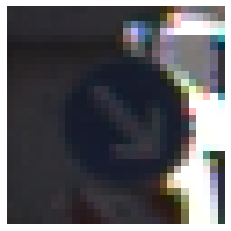

In [23]:
plt.imshow(X_train[1000])
plt.axis('off')
print(X_train[1000].shape)
print(y_train[1000])

In [25]:
# Using ImageDataGenerator which will perform various transformations to the training dataset and then use it for training
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.15,
        zoom_range=0.15,
        horizontal_flip=False,
        vertical_flip=False
        )



**Now it's time to build the model**

In [26]:
model =Sequential() 
#for better accuracy we can change many things here such as filter size, kernel size activation filter
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
# 
# number of filters is choosen as 32 for random
#input shape is 
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax')) # The value Dense should be 43 because our classes are 43

In [27]:
epochs = 20
lr = 0.001
batch_size = 64

In [28]:
#Adam Optimizer is used here
optimizer = Adam(learning_rate=lr, decay=lr / (epochs))

In [29]:
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [30]:
#Compilation of the model
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Model display
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [24]:
batch_size=64

In [31]:
#Start Training
  H = model.fit(
	datagen.flow(X_train, y_train, batch_size),
	validation_data=(X_test, y_test),
	epochs=epochs,
	verbose=1)

Epoch 1/20
491/491 [==============================] - 26s 29ms/step - loss: 3.1264 - accuracy: 0.2476 - val_loss: 1.5881 - val_accuracy: 0.5291
Epoch 2/20
491/491 [==============================] - 14s 28ms/step - loss: 1.5738 - accuracy: 0.5189 - val_loss: 0.8184 - val_accuracy: 0.7513
Epoch 3/20
491/491 [==============================] - 14s 28ms/step - loss: 1.0425 - accuracy: 0.6821 - val_loss: 0.3308 - val_accuracy: 0.9083
Epoch 4/20
491/491 [==============================] - 14s 29ms/step - loss: 0.7215 - accuracy: 0.7815 - val_loss: 0.1470 - val_accuracy: 0.9629
Epoch 5/20
491/491 [==============================] - 14s 28ms/step - loss: 0.5166 - accuracy: 0.8482 - val_loss: 0.1029 - val_accuracy: 0.9754
Epoch 6/20
491/491 [==============================] - 14s 28ms/step - loss: 0.4187 - accuracy: 0.8793 - val_loss: 0.0705 - val_accuracy: 0.9828
Epoch 7/20
491/491 [==============================] - 14s 28ms/step - loss: 0.3580 - accuracy: 0.8977 - val_loss: 0.0619 - val_accuracy:

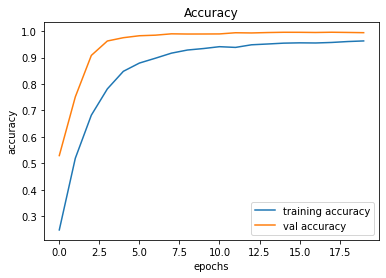

In [32]:
#Plotting training accuracy vs Validation Accuracy
plt.figure(0)
plt.plot(H.history['accuracy'], label='training accuracy')
plt.plot(H.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

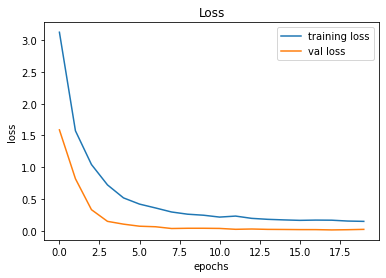

In [33]:
# Plotting training Loss vs Validation Loss
plt.plot(H.history['loss'], label='training loss')
plt.plot(H.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**Save the model**

In [37]:
path = '/content/gdrive/MyDrive/Traffic_Sign_Classification/dataset/trained_model'
isdir = os.path.isdir(path) 
if not isdir:
  os.mkdir('/content/gdrive/MyDrive/Traffic_Sign_Classification/dataset/trained_model')

In [38]:
model.save("/content/gdrive/MyDrive/Traffic_Sign_Classification/dataset/trained_model/TSC.h5")
#model.save("/content/TSR.h5")

**Testing the Model**

**Load the Model**

In [39]:
from keras.models import load_model
model = load_model('/content/gdrive/MyDrive/Traffic_Sign_Classification/dataset/trained_model/TSC.h5')

In [40]:
# Classes of trafic signs and As the classes have numeric label from 0 to 42.
#Define the classes with respective names for each label
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [41]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = np.argmax(model.predict(X_test), axis=-1)
    return image,Y_pred

Predicted traffic sign is:  General caution


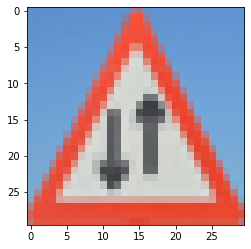

In [56]:
plot,prediction = test_on_img(r'/content/gdrive/MyDrive/Traffic_Sign_Classification/dataset/Testing_Images/14.jpeg')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()